<a href="https://colab.research.google.com/github/pradiptars/Ml_kaggle_Go_daddy/blob/main/GoDaddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving train.csv to train.csv
User uploaded file "train.csv" with length 8822145 bytes


In [3]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
df = pd.concat([train, test], axis=0)

In [6]:
df.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0


In [8]:
df['first_day_of_month'] = pd.to_datetime(df['first_day_of_month'])
df['year'] = df['first_day_of_month'].dt.year
df['month'] = df['first_day_of_month'].dt.month
df['day'] = df['first_day_of_month'].dt.day
df['day_of_week'] = df['first_day_of_month'].dt.dayofweek
df['day_of_year'] = df['first_day_of_month'].dt.dayofyear
df['week_of_year'] = df['first_day_of_month'].dt.isocalendar().week.astype(int)
display(df.head())

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,day,day_of_week,day_of_year,week_of_year
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0,2019,8,1,3,213,31
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0,2019,9,1,6,244,35
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269.0,2019,10,1,1,274,40
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243.0,2019,11,1,4,305,44
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243.0,2019,12,1,6,335,48


In [7]:
df.select_dtypes(include='object').columns

Index(['row_id', 'county', 'state', 'first_day_of_month'], dtype='object')

In [9]:
df['row_id_numeric'] = pd.factorize(df['row_id'])[0]
display(df[['row_id', 'row_id_numeric']].head())

,row_id,row_id_numeric
0,1001_2019-08-01,0
1,1001_2019-09-01,1
2,1001_2019-10-01,2
3,1001_2019-11-01,3
4,1001_2019-12-01,4


In [11]:
df['county_numeric'] = pd.factorize(df['county'])[0]
display(df[['county', 'county_numeric']].head())

,county,county_numeric
0,Autauga County,0
1,Autauga County,0
2,Autauga County,0
3,Autauga County,0
4,Autauga County,0


In [12]:
df.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,day,day_of_week,day_of_year,week_of_year,row_id_numeric,county_numeric
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0,2019,8,1,3,213,31,0,0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0,2019,9,1,6,244,35,1,0


In [13]:
df['state_numeric'] = pd.factorize(df['state'])[0]
display(df[['state', 'state_numeric']].head())

,state,state_numeric
0,Alabama,0
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0


In [14]:
df.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,day,day_of_week,day_of_year,week_of_year,row_id_numeric,county_numeric,state_numeric
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249.0,2019,8,1,3,213,31,0,0,0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198.0,2019,9,1,6,244,35,1,0,0


In [15]:
df.keys()

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'year', 'month', 'day',
       'day_of_week', 'day_of_year', 'week_of_year', 'row_id_numeric',
       'county_numeric', 'state_numeric'],
      dtype='object')

In [16]:
df.drop(['row_id', 'county', 'state', 'first_day_of_month'], axis=1, inplace=True)

In [17]:
df.head(2)

,cfips,microbusiness_density,active,year,month,day,day_of_week,day_of_year,week_of_year,row_id_numeric,county_numeric,state_numeric
0,1001,3.007682,1249.0,2019,8,1,3,213,31,0,0,0
1,1001,2.884870,1198.0,2019,9,1,6,244,35,1,0,0


<Axes: >

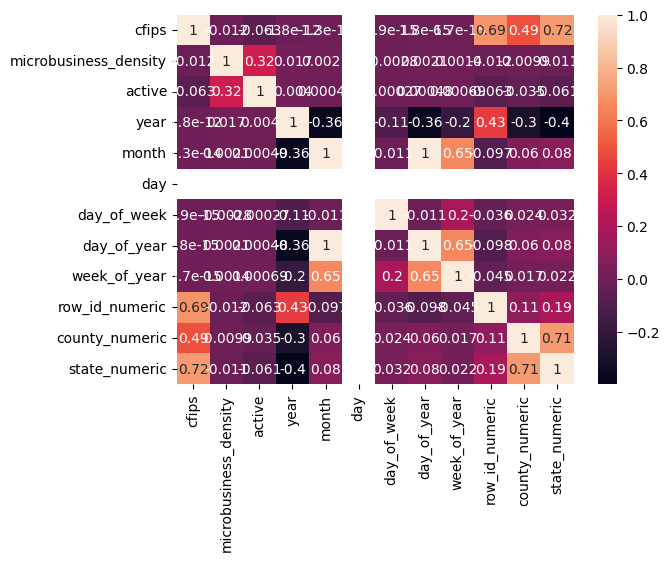

In [18]:
sns.heatmap(df.corr(), annot=True)

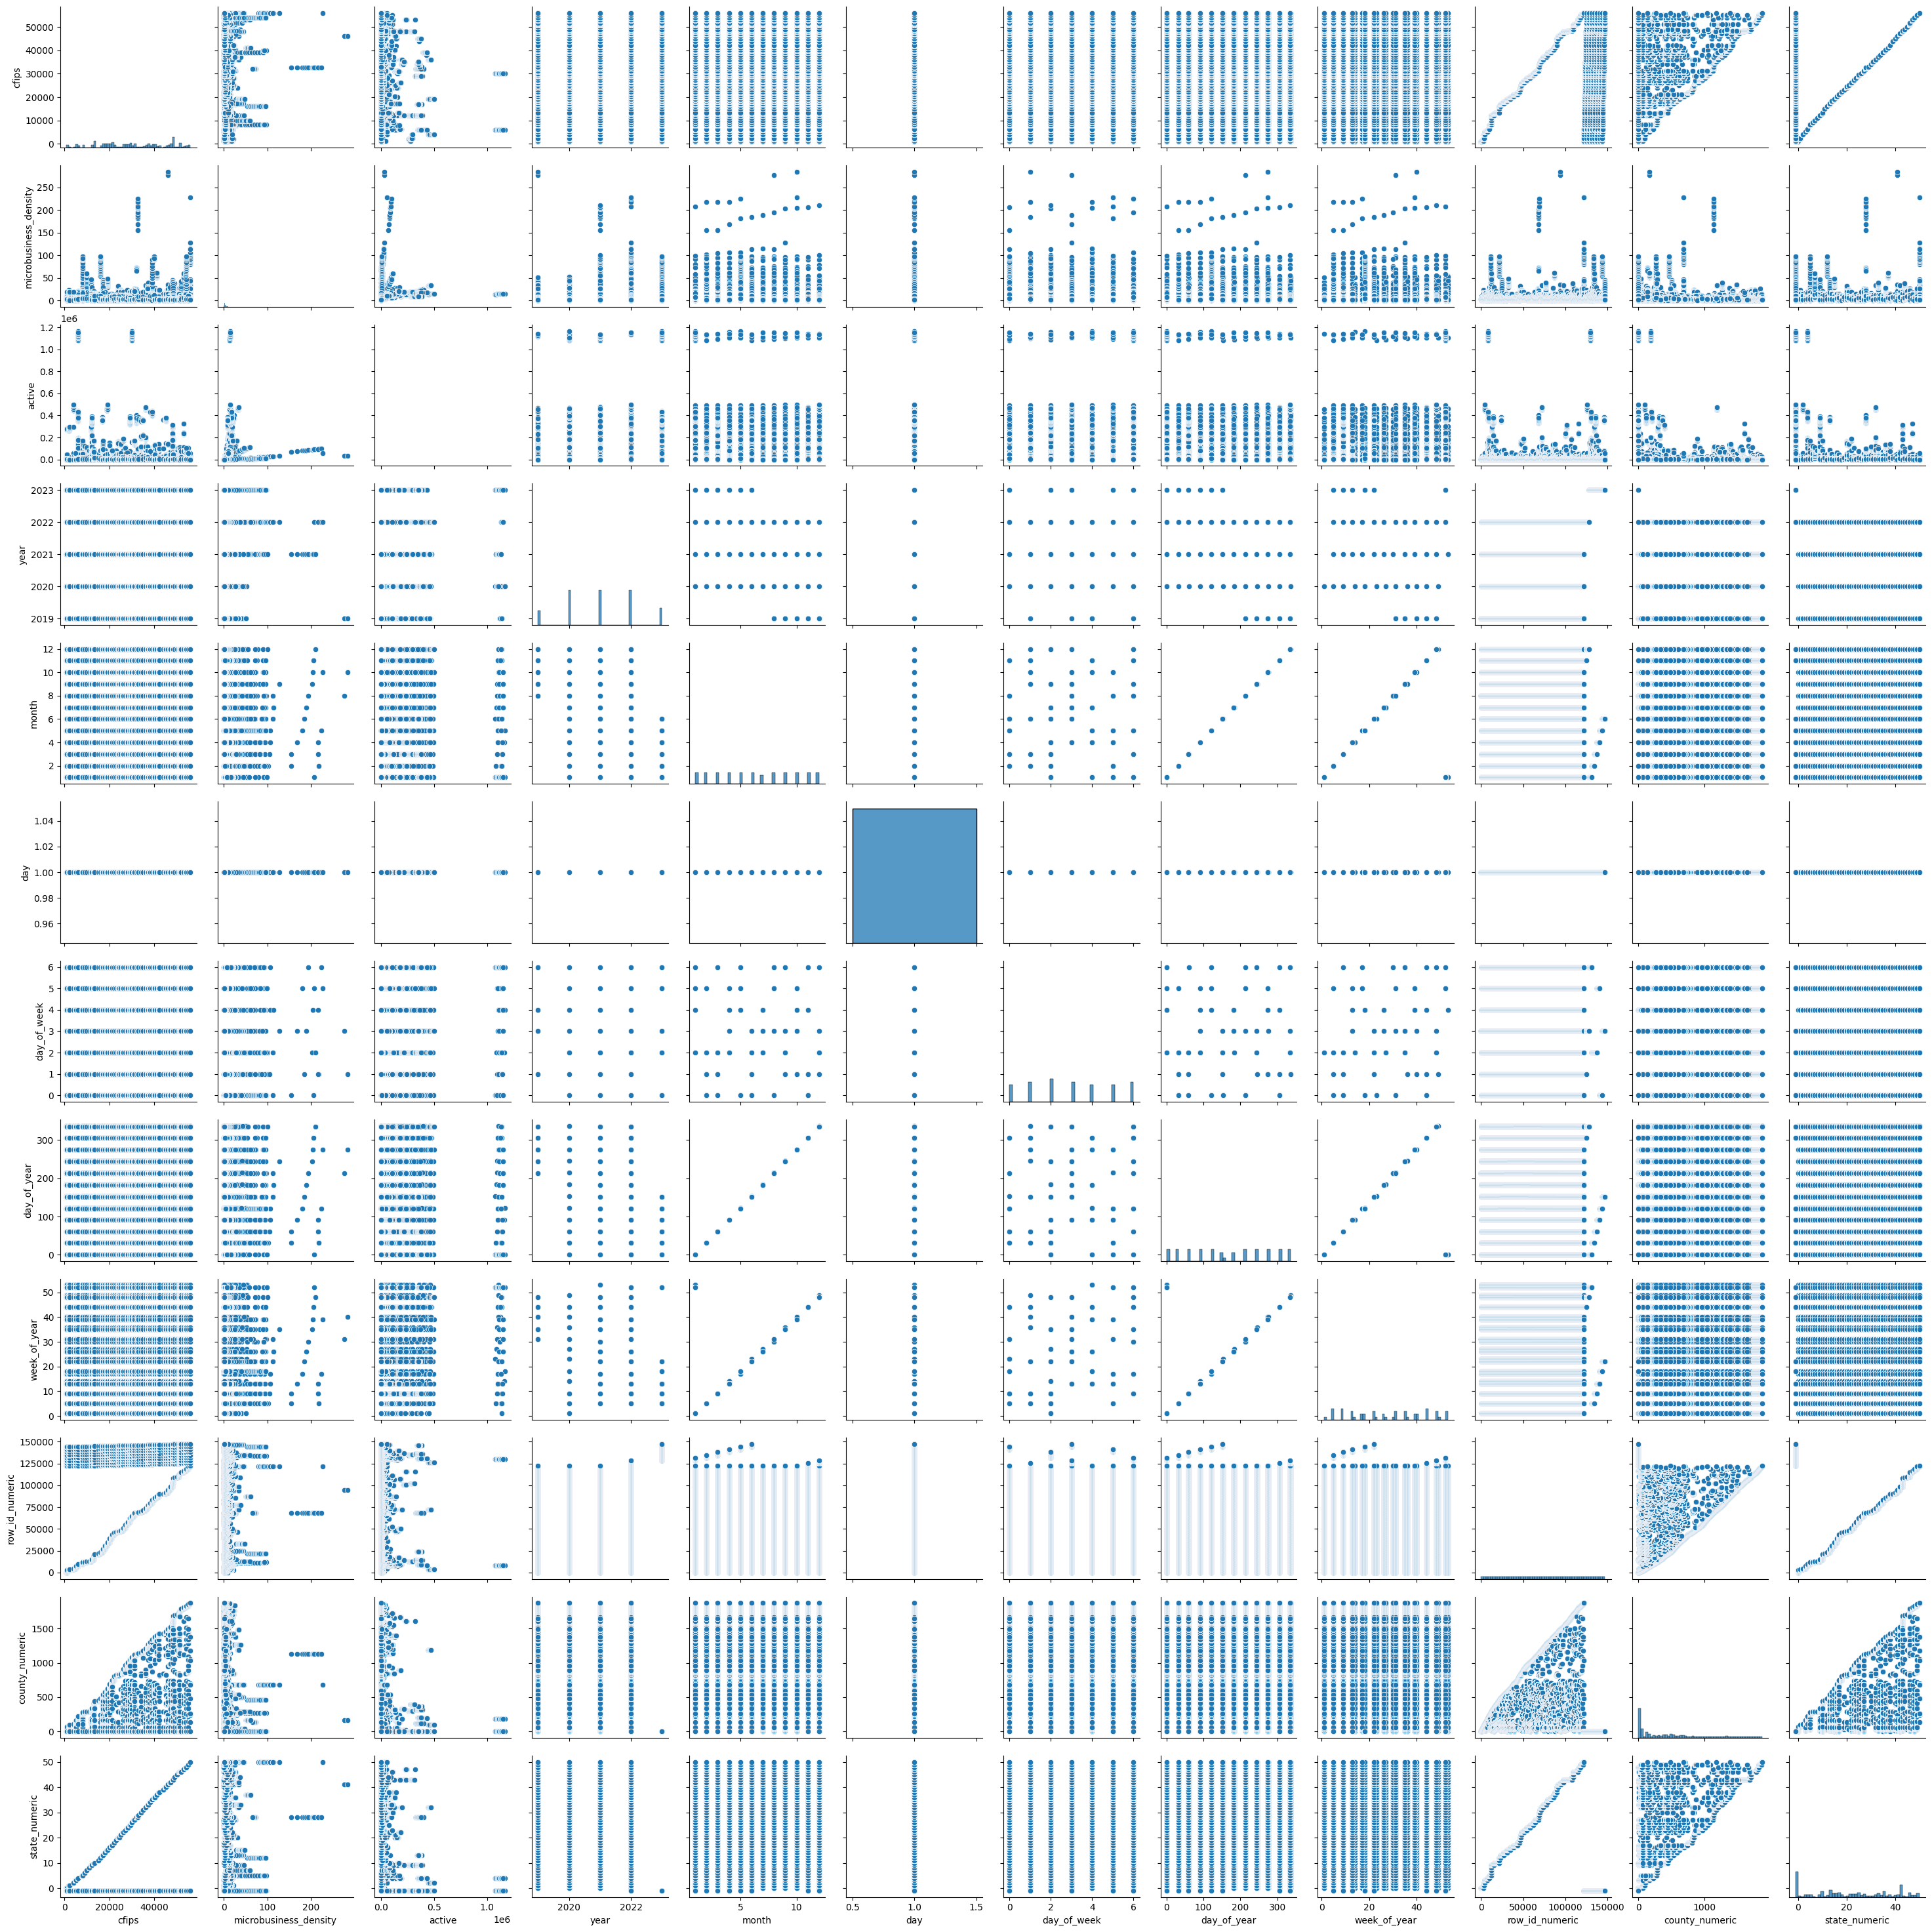

In [19]:
sns.pairplot(df)

<Axes: >

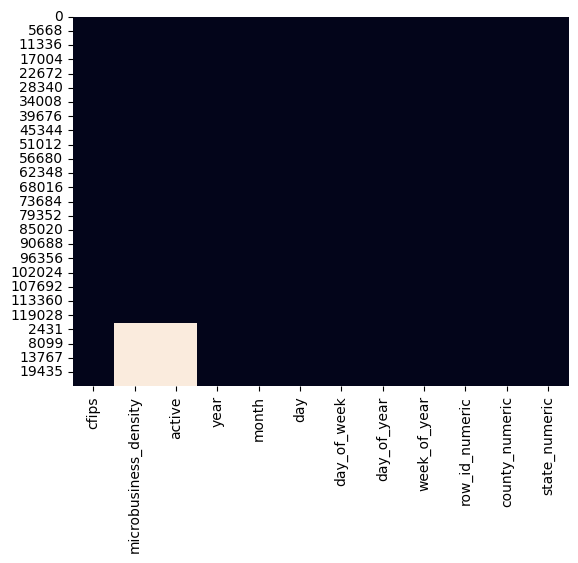

In [20]:
sns.heatmap(df.isnull(), cbar=False)

In [21]:
df.fillna(df.mean(), inplace=True)

<Axes: >

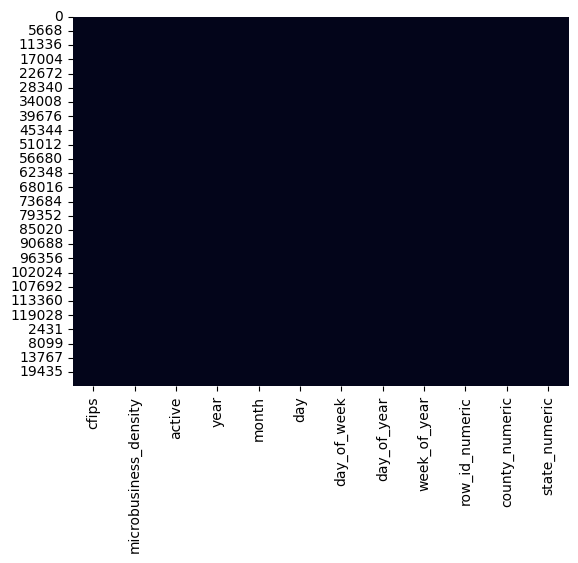

In [22]:
sns.heatmap(df.isnull(), cbar=False)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df.keys()

Index(['cfips', 'microbusiness_density', 'active', 'year', 'month', 'day',
       'day_of_week', 'day_of_year', 'week_of_year', 'row_id_numeric',
       'county_numeric', 'state_numeric'],
      dtype='object')

In [26]:
X = df.drop('microbusiness_density', axis=1)
y = df['microbusiness_density']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
lr.score(X_test, y_test)

0.1229499163691512

In [33]:
import xgboost as xgb
xgb= xgb.XGBRegressor(random_state=42, bbooster='gbtree')
xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:04:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "bbooster" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, bbooster='gbtree', booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

In [34]:
xgb.score(X_test, y_test)

0.924321285168479

In [35]:
y_pred = np.exp(xgb.predict(X_test))

/tmp/ipython-input-1747497084.py:1: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(xgb.predict(X_test))


In [36]:
submit_test = pd.concat([test['row_id'], pd.DataFrame(y_pred, columns=['microbusiness_density'])], axis=1)
submit_test.head()

,row_id,microbusiness_density
0,1001_2022-11-01,1.308491
1,1003_2022-11-01,46.645390
2,1005_2022-11-01,8.896825
3,1007_2022-11-01,45.837627
4,1009_2022-11-01,38.692928


In [37]:
submit_test.to_csv('godaddy_submission.csv', index=False)